In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

UN SUPERVISED MACHINE LEARNING :UNCOVERING HIDEN PATTERN FROM YOUR DATA

In [2]:
## IMPORT DATA SET
cast=pd.read_csv("F:\\Downloads\\Mall_Customers Dataset.csv")
cast

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
cast.shape

(200, 5)

In [4]:
cast.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
cast.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
T=cast[['Annual Income (k$)','Spending Score (1-100)']]
T

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
T_scaled=scaler.fit_transform(T)
T_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [13]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=8,random_state=42)
labels_km=Kmeans.fit_predict(T_scaled)

C:\Users\highe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'KMEANS WORK')

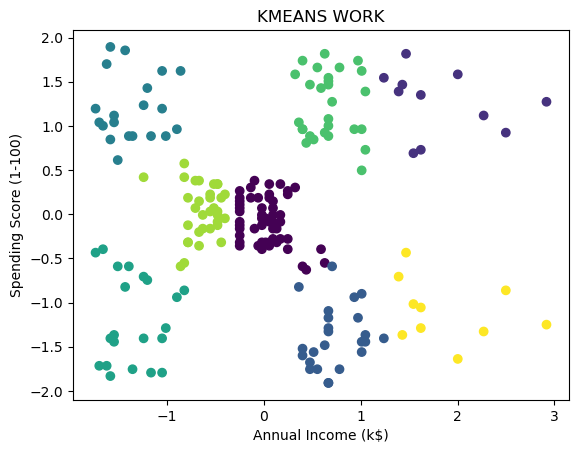

In [14]:
plt.scatter(T_scaled[:,0],T_scaled[:,1],c=Kmeans.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMEANS WORK")


In [19]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
label_db=dbscan.fit_predict(T_scaled)

Text(0.5, 1.0, 'DBSCAN WORK')

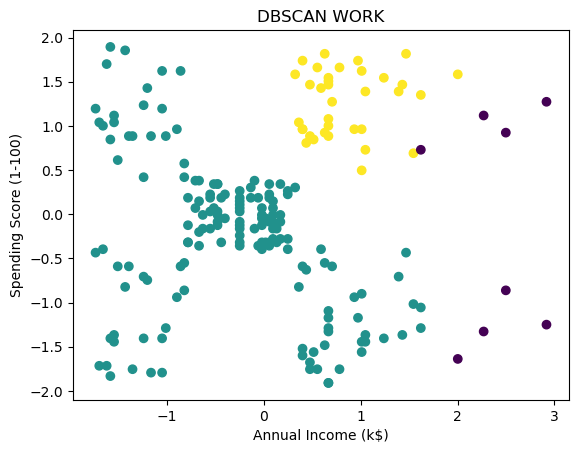

In [21]:
plt.scatter(T_scaled[:,0],T_scaled[:,1],c=dbscan.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN WORK")

In [22]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5,random_state=42)
labels_gmm=gmm.fit_predict(T_scaled)

C:\Users\highe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'GMM WORK')

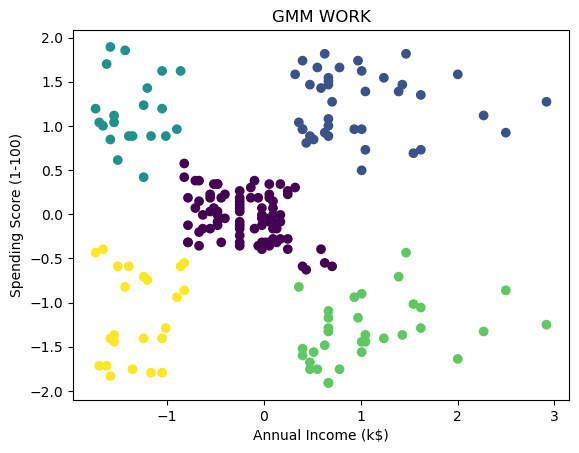

In [23]:
plt.scatter(T_scaled[:,0],T_scaled[:,1],c=labels_gmm)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("GMM WORK")

EVALUATION METRICS (-1-1) 1.Siilhouette :0.5-good separation,0.25-0.5reasonable ,<0.25--weak clustering 2.DBI(Davises-bouldin Index): range:0-infinity lower is better.

In [35]:
##EVALUATION ALL THE MODEL
from sklearn.metrics import silhouette_score,davies_bouldin_score
def evaluate(T_scaled,lables):
    return{"silhoutte":silhoutte_score(T,labels),
            "DBI":davies_bouldin_score(T,labels)}
    result={
        "KMeans":evaluate(T_sccaled,labels_Km),
        "DBSCAN":evaluate(T_scaled,labels_db),
        "GMM":evaluate(T_scaled,labels_gmm),
    }
    pd.DataFrame(result)